In [ ]:
#Data loading script for housing dataset

from pathlib import Path 
import pandas as pd 
import tarfile 
import urllib.request 
 
def load_housing_data(): 
    tarball_path = Path("datasets/housing.tgz") 
    if not tarball_path.is_file(): 
        Path("datasets").mkdir(parents=True, exist_ok=True) 
        url = "https://github.com/ageron/data/raw/main/housing.tgz" 
        urllib.request.urlretrieve(url, tarball_path) 
        with tarfile.open(tarball_path) as housing_tarball: 
            housing_tarball.extractall(path="datasets") 
    return pd.read_csv(Path("datasets/housing/housing.csv")) 
 
housing = load_housing_data()

In [5]:
housing.head()  # Display the first few rows of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


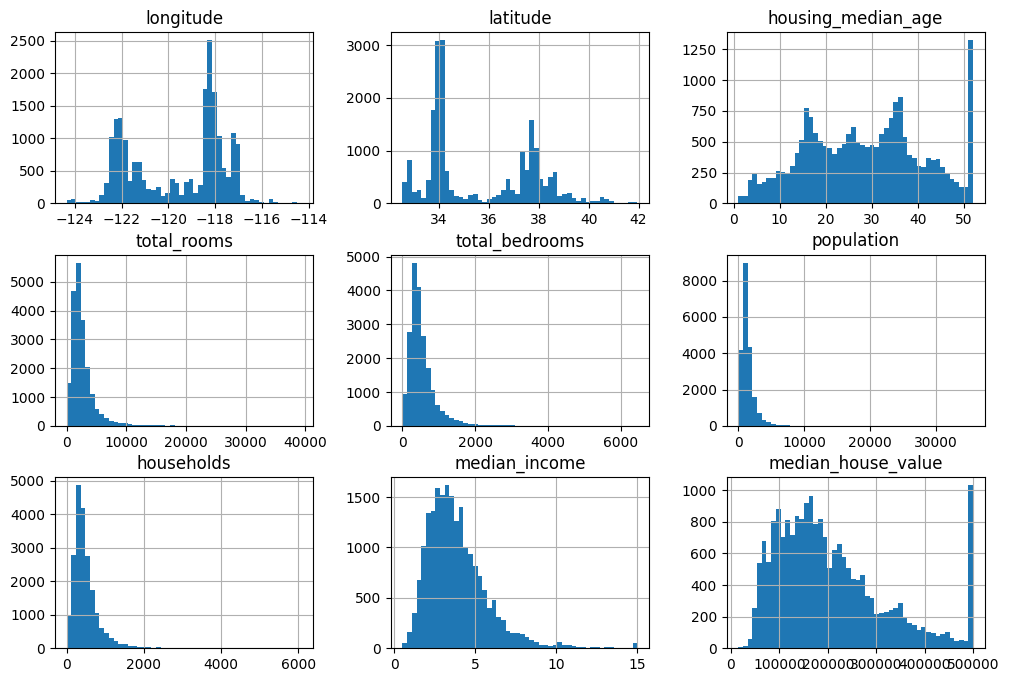

In [8]:
import matplotlib.pyplot as plt 
housing.hist(bins=50, figsize=(12, 8)) 
plt.show()

In [10]:
import numpy as np 
def shuffle_and_split_data(data, test_ratio): 
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = shuffle_and_split_data(housing, 0.2) 
print(len(train_set))
print(len(test_set))

16512
4128


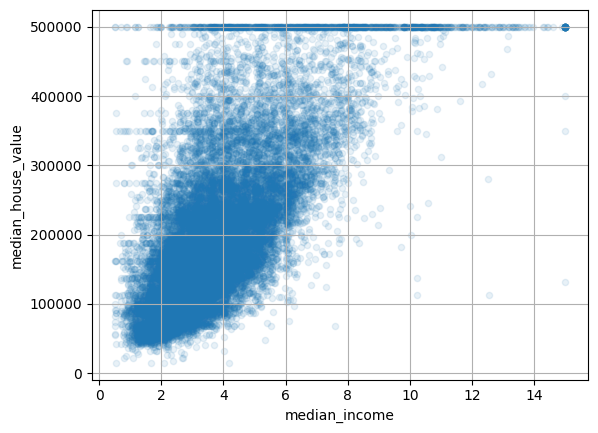

In [13]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", 
alpha=0.1, grid=True) 
plt.show()

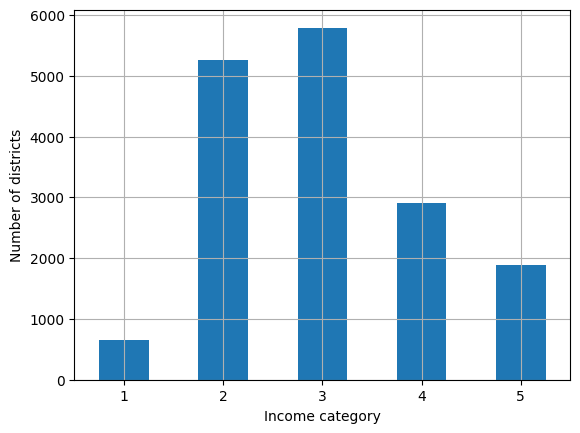

In [42]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [14]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"] 
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"] 
housing["people_per_house"] = housing["population"] / housing["households"]

In [16]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

In [22]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# Step 1: create income category
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

# Step 2: stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]

# Step 3: remove income_cat (clean datasets)
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17460\3319427040.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [23]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [24]:
median = housing["total_bedrooms"].median()  # option 3 
housing["total_bedrooms"].fillna(median, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17460\2638922503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


In [26]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [28]:
X = imputer.transform(housing_num)

In [29]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, 
index=housing_num.index)

In [30]:
housing_cat = housing[["ocean_proximity"]] 
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [31]:
from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder() 
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [32]:
housing_cat_encoded[:8] 

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [33]:
from sklearn.preprocessing import OneHotEncoder 
 
cat_encoder = OneHotEncoder() 
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [34]:
from sklearn.preprocessing import MinMaxScaler 
min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) 
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [35]:
from sklearn.preprocessing import StandardScaler 
std_scaler = StandardScaler() 
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [36]:
from sklearn.metrics.pairwise import rbf_kernel 
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [37]:
from sklearn.linear_model import LinearRegression 
target_scaler = StandardScaler() 
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) 
model = LinearRegression() 
model.fit(housing[["median_income"]], scaled_labels) 
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data 
scaled_predictions = model.predict(some_new_data) 
predictions = target_scaler.inverse_transform(scaled_predictions)

In [38]:
from sklearn.compose import TransformedTargetRegressor 
model = TransformedTargetRegressor(LinearRegression(), 
transformer=StandardScaler()) 
model.fit(housing[["median_income"]], housing_labels) 
predictions = model.predict(some_new_data)

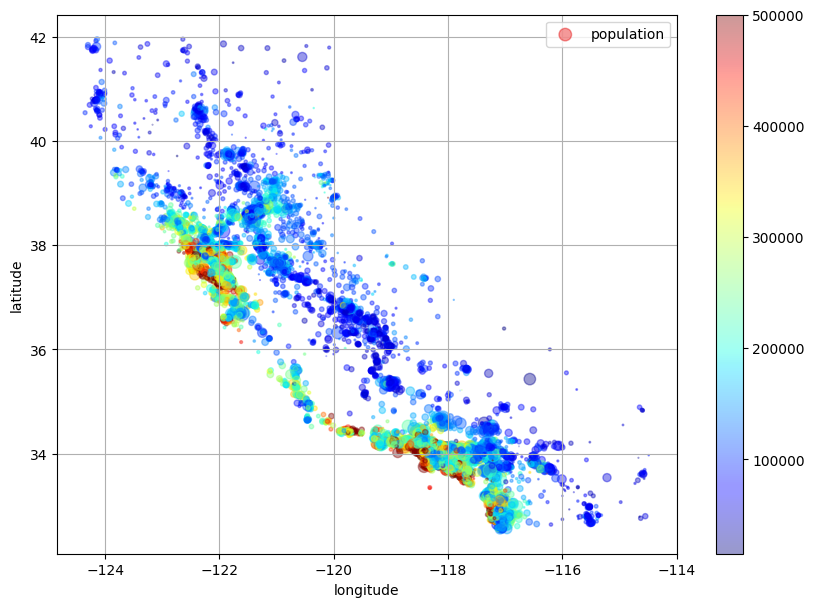

In [48]:
strat_train_set.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    grid=True,
    s=strat_train_set["population"] / 100,
    label="population",
    c=strat_train_set["median_house_value"],
    cmap="jet",
    colorbar=True,
    alpha=0.4,
    figsize=(10, 7)
)
plt.show()


In [51]:
from pathlib import Path
import urllib.request
import matplotlib.pyplot as plt

# Create folder for images if it doesn't exist
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


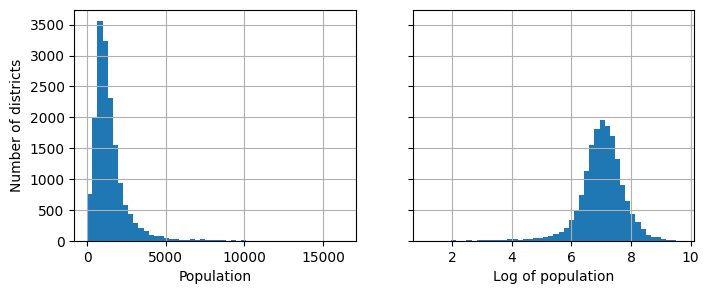

In [59]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# --- Split features and labels ---
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# --- Numerical + categorical pipeline ---
num_attribs = list(housing.drop("ocean_proximity", axis=1))
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# --- Preprocess the data ---
housing_prepared = full_pipeline.fit_transform(housing)


In [60]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

Final Model RMSE: 18496.958508268486
Final Model R²: 0.9742686533888208


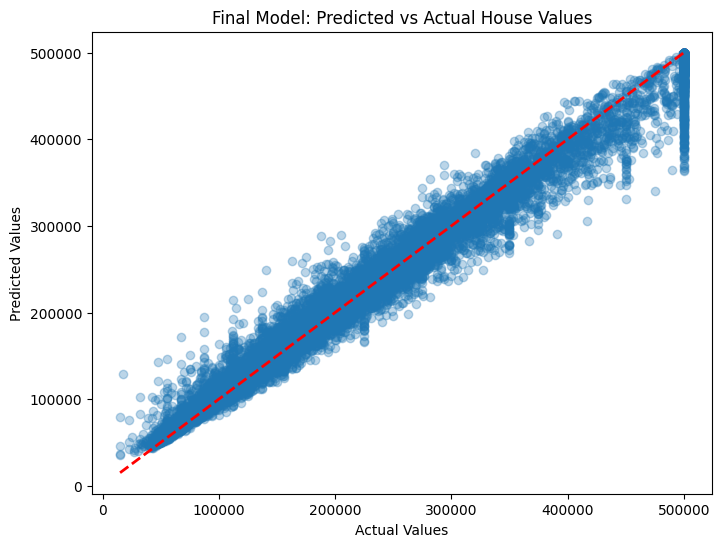

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predictions on training set
final_predictions = final_model.predict(housing_prepared)

# RMSE (fixed version for older sklearn)
final_mse = mean_squared_error(housing_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

# R² score
final_r2 = r2_score(housing_labels, final_predictions)

print("Final Model RMSE:", final_rmse)
print("Final Model R²:", final_r2)

# --- Visualization ---
plt.figure(figsize=(8, 6))
plt.scatter(housing_labels, final_predictions, alpha=0.3)
plt.plot([housing_labels.min(), housing_labels.max()],
         [housing_labels.min(), housing_labels.max()],
         "r--", lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Final Model: Predicted vs Actual House Values")
plt.show()


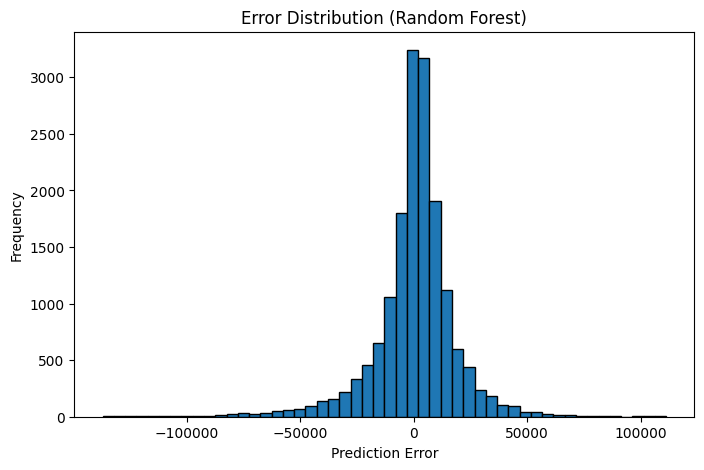

In [66]:
errors = final_predictions - housing_labels

plt.figure(figsize=(8, 5))
plt.hist(errors, bins=50, edgecolor="k")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution (Random Forest)")
plt.show()


In [68]:
# Prepare the test data
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

# Predictions on test set
final_test_predictions = final_model.predict(X_test_prepared)

# RMSE & R² on test set
final_test_mse = mean_squared_error(y_test, final_test_predictions)
final_test_rmse = np.sqrt(final_test_mse)
final_test_r2 = r2_score(y_test, final_test_predictions)

print("Test Set RMSE:", final_test_rmse)
print("Test Set R²:", final_test_r2)


Test Set RMSE: 50250.4200113139
Test Set R²: 0.8113617318487569


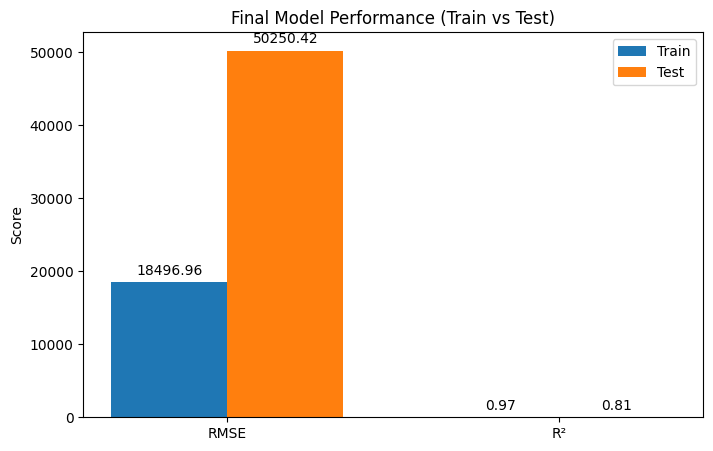

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Compare Train vs Test
metrics = ["RMSE", "R²"]
train_scores = [18496.96, 0.974]  # From training
test_scores = [50250.42, 0.811]   # From test

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
train_bar = ax.bar(x - width/2, train_scores, width, label="Train")
test_bar = ax.bar(x + width/2, test_scores, width, label="Test")

ax.set_ylabel("Score")
ax.set_title("Final Model Performance (Train vs Test)")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate bars
for bars in [train_bar, test_bar]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()



In [71]:
# Assuming you already have strat_train_set and strat_test_set from StratifiedShuffleSplit

# Separate predictors (features) and labels (target)
train_set = strat_train_set.drop("median_house_value", axis=1)
train_labels = strat_train_set["median_house_value"].copy()

test_set = strat_test_set.drop("median_house_value", axis=1)
test_labels = strat_test_set["median_house_value"].copy()

# Prepare the data (using the same pipeline you used for training)
test_prepared = full_pipeline.transform(test_set)

# Now get predictions
final_predictions_test = final_model.predict(test_prepared)

# Evaluate with MAPE
from sklearn.metrics import mean_absolute_percentage_error

test_mape = mean_absolute_percentage_error(test_labels, final_predictions_test)
test_accuracy = 100 * (1 - test_mape)

print(f"Test Set Accuracy (approx): {test_accuracy:.2f}%")


Test Set Accuracy (approx): 82.29%


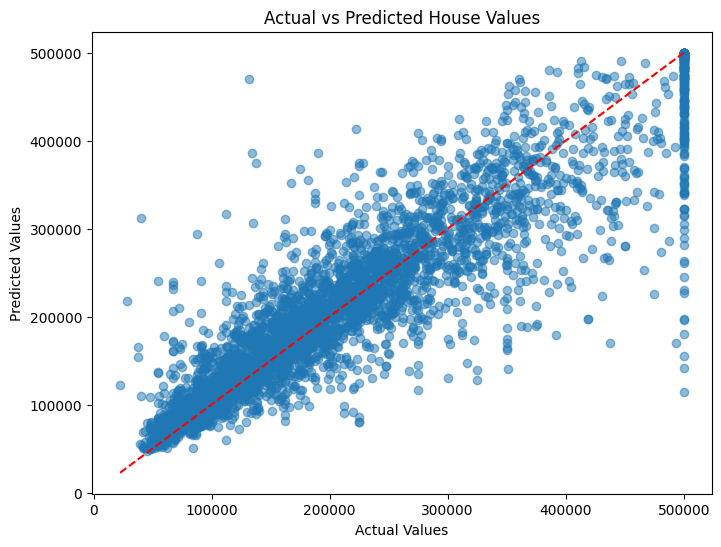

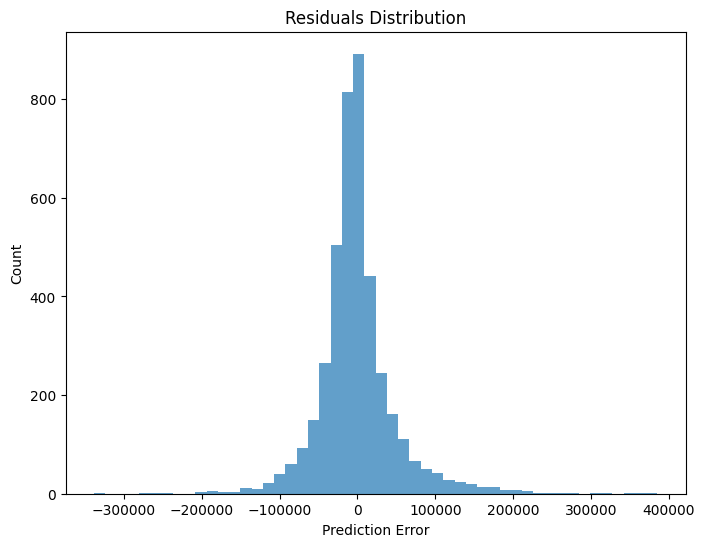

In [72]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(test_labels, final_predictions_test, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Values")
plt.plot([test_labels.min(), test_labels.max()],
         [test_labels.min(), test_labels.max()], "r--")  # ideal line
plt.show()

# Residuals (errors)
residuals = test_labels - final_predictions_test
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Residuals Distribution")
plt.show()
